In [85]:
from config import *
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [86]:
df_kfs = pd.read_csv('computed_kfs.csv', delimiter=',', index_col=0)
df_input = pd.read_excel('input-data.xlsx', usecols=['depth'], skiprows=[1])
df_kfs['depth'] = df_input
df_kfs.head()

,sample,Carling and Reader (1982) [Estimated kf],Wu and Wang (2006) [Estimated kf],Wooster et al. (2008) [Estimated kf],Frings et al. (2011) [Estimated kf],depth
0,Ref before,0.000251,0.000235,0.000235,0.000234,0.12
1,Ref before,0.000214,0.000214,0.000214,0.000214,0.15
2,Ref before,0.000072,0.000072,0.000072,0.000072,0.18
3,Ref before,0.000002,0.000002,0.000002,0.000002,0.27
4,Ref after,0.013500,0.011700,0.013500,0.014500,0.12


In [87]:
df_kfs.describe()

,Carling and Reader (1982) [Estimated kf],Wu and Wang (2006) [Estimated kf],Wooster et al. (2008) [Estimated kf],Frings et al. (2011) [Estimated kf],depth
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.002043,0.002039,0.002087,0.002075,0.264691
std,0.002591,0.002508,0.002676,0.002663,0.110466
min,0.000002,0.000002,0.000002,0.000002,0.090000
25%,0.000136,0.000134,0.000136,0.000136,0.180000
50%,0.000917,0.001020,0.000975,0.000965,0.240000
75%,0.003430,0.003240,0.003290,0.003320,0.330000
max,0.013500,0.011700,0.013500,0.014500,0.540000


In [88]:
meas_array = df_kfs['sample'].unique().tolist()
meas_array

['Ref before',
 'Ref after',
 'A-1 before',
 'A-1 after',
 'A-2 before',
 'A-2 after',
 'B-1 before',
 'B-1 after',
 'B-2 before',
 'B-2 after']

C:\Users\NEGREI~1\AppData\Local\Temp/ipykernel_15704/2785809189.py:23: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



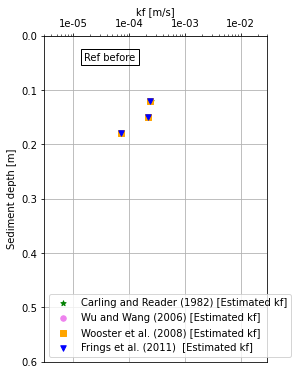

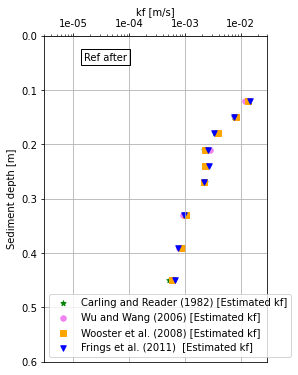

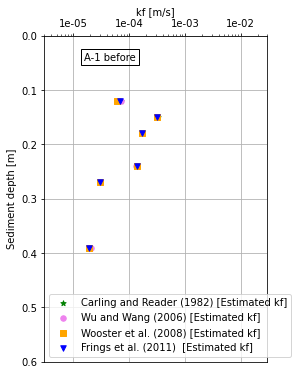

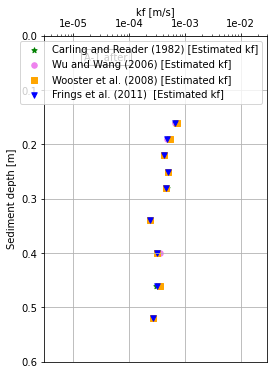

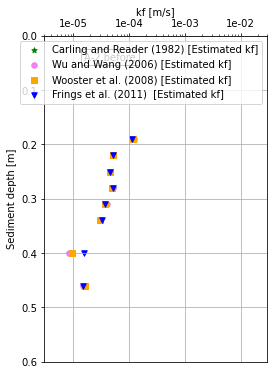

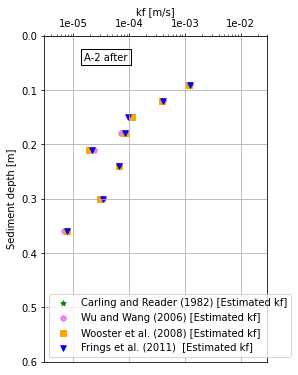

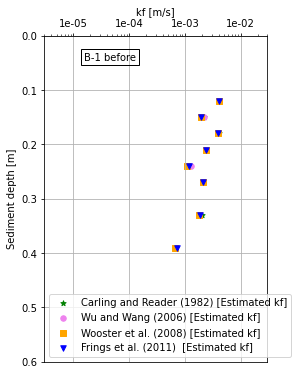

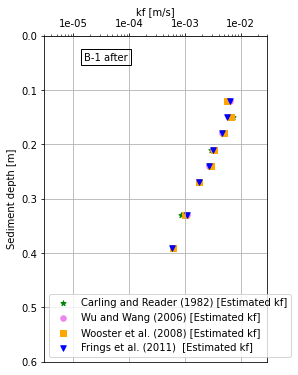

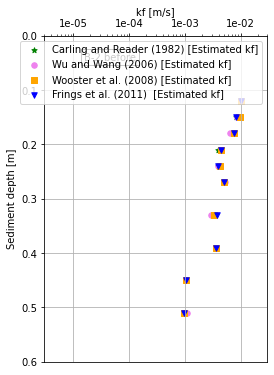

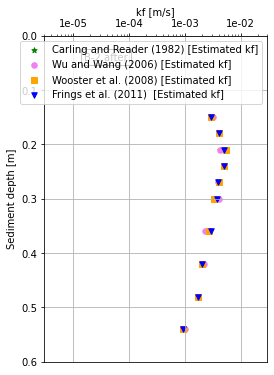

In [103]:
cols = df_kfs.columns.values.tolist()
methods_list = cols[1:-1]
colors = ['green', 'violet', 'orange', 'blue']
symbols = ['*', 'o', 's', 'v']
color_dict = dict(zip(methods_list, colors))
marker_list = dict(zip(methods_list, symbols))
for meas in meas_array:
    df_toplot = df_kfs[df_kfs['sample'] == meas]
    fig, ax = plt.subplots(figsize=(4,6))
    for method in methods_list:
        df_toplot.plot.scatter(x=method, y='depth', color=color_dict[method], ax=ax, label=method, s=30, marker=marker_list[method], grid=True)
    ax.set_xlabel('kf [m/s]')
    ax.set_ylabel('Sediment depth [m]')
    ax.xaxis.set_label_position(
                        'top')  # axis label is located on the top, instead of on the bottom as usual
    ax.xaxis.tick_top()
    ax.set_ylim(bottom=0.6, top=0)
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%1.0e'))
    ax.set_xlim(0.000003, 0.030)
    props = dict(boxstyle='Square', fill=False, alpha=1)
    ax.text(0.18, 0.95, meas, fontsize=10, transform=ax.transAxes, verticalalignment='top', bbox=props)
    fig.show()

['Carling and Reader (1982) [Estimated kf]',
 'Wu and Wang (2006) [Estimated kf]',
 'Wooster et al. (2008) [Estimated kf]',
 'Frings et al. (2011)  [Estimated kf]']